In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
from keras.regularizers import l2

import sys

In [11]:
#functions
def mse_loss(y_predict, y):
    return np.mean(np.square(y_predict - y)) 

def mae_loss(y_predict, y):
    return np.mean(np.abs(y_predict - y)) 

def build_nn_model(layers):
    nn_model = Sequential()
    for i in range(len(layers)-1):
        nn_model.add( Dense(input_dim=layers[i], output_dim= layers[i+1]) )#, W_regularizer=l2(0.1)) )
        nn_model.add( Dropout(0.5) )
        if i < (len(layers) - 2):
            nn_model.add( Activation('relu') )
    print(nn_model.summary())
    return nn_model


In [12]:
def plot_each_app(df, num_date, predict, y_test, title, look_back = 0):
    num_date = len(dates)
    fig, axes = plt.subplots(num_date,1,figsize=(24, num_date*5) )
    plt.suptitle(title, fontsize = '25')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for i in range(num_date):
        if i == 0: l = 0
        ind = df.ix[dates[i]].index[look_back:]
        axes.flat[i].plot(ind, y_test[l:l+len(ind)], color = 'blue', alpha = 0.6, label = 'True value')
        axes.flat[i].plot(ind, predict[l:l+len(ind)], color = 'red', alpha = 0.6, label = 'Predicted value')
        axes.flat[i].legend()
        l = len(ind)

In [20]:
app =  'microwave_11' #'refrigerator_5'
path = 'train_test_data/'

#read data
df_train = pd.read_csv(path+'H1_train.csv')
df_val = pd.read_csv(path+'H1_val.csv')
df_test = pd.read_csv(path+'H1_test.csv')

#turn first column into date_time index
df_list = [df_train, df_val, df_test]
for df in df_list:
    df['timestamp'] = pd.to_datetime(df['Unnamed: 0'])
    df = df.set_index('timestamp')
    
X_train1 = df_train[['mains_1','mains_2']].values
y_train1 = df_train[app].values
X_val1 = df_val[['mains_1','mains_2']].values
y_val1 = df_val[app].values
X_test1 = df_test[['mains_1','mains_2']].values
y_test1 = df_test[app].values

In [5]:
#setting parameters
input_dim = 2
layer1_dim = 64
layer2_dim = 128
output_dim = 1

#Constructing Neural Network
layers = [input_dim, layer1_dim, layer2_dim, output_dim]
fc_model_1 = build_nn_model(layers)

adam = Adam(lr = 0.001)
fc_model_1.compile(loss='mean_squared_error', optimizer=adam)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
__________

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=2, units=64)`
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=64, units=128)`
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=128, units=1)`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
hist_fc_1 = fc_model_1.fit( X_train1, y_train1,
                    batch_size=512, verbose=1, nb_epoch=100,
                    validation_split=0.33)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 143926 samples, validate on 70890 samples
Epoch 1/100


In [15]:
pd.DataFrame(y_test1).head()

,0
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0


In [16]:
test = pd.DataFrame()

In [22]:
test = pd.DataFrame()
test['time'] = df_test['Unnamed: 0']
test['y_true'] = y_test1
test.head()

,y_true,time
0,4.0,2011-05-11 07:19:47
1,4.0,2011-05-11 07:20:08
2,4.0,2011-05-11 07:20:17
3,4.0,2011-05-11 07:20:20
4,4.0,2011-05-11 07:20:24


In [21]:
df_test

,Unnamed: 0,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,...,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20,timestamp
0,2011-05-11 07:19:47,97.52,38.38,0.0,0.0,6.0,0.0,23.0,20.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:19:47
1,2011-05-11 07:20:08,95.61,38.29,0.0,0.0,7.0,0.0,21.0,20.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:08
2,2011-05-11 07:20:17,94.86,38.56,0.0,0.0,7.0,0.0,22.0,20.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:17
3,2011-05-11 07:20:20,95.21,38.29,0.0,0.0,6.0,0.0,24.0,21.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:20
4,2011-05-11 07:20:24,95.82,38.35,0.0,0.0,7.0,0.0,22.0,20.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:24
5,2011-05-11 07:20:27,94.78,38.57,0.0,0.0,7.0,0.0,22.0,20.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:27
6,2011-05-11 07:20:31,94.58,38.16,0.0,0.0,7.0,0.0,21.0,21.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:31
7,2011-05-11 07:20:34,95.03,38.30,0.0,0.0,7.0,0.0,21.0,21.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:34
8,2011-05-11 07:20:38,99.15,38.54,0.0,0.0,6.0,0.0,26.0,20.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:38
9,2011-05-11 07:20:41,97.72,38.26,0.0,0.0,7.0,0.0,24.0,20.0,42.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2011-05-11 07:20:41


In [23]:
df2 = pd.read_csv('train_test_data/H2_test_full.csv')

In [24]:
df2.head()

,Unnamed: 0,mains_1,mains_2,kitchen_outlets_3,lighting_4,stove_5,microwave_6,washer_dryer_7,kitchen_outlets_8,refrigerator_9,dishwaser_10,disposal_11
0,2011-04-18 05:31:40,15.71,22.61,1.0,8.0,1.0,4.0,4.0,4.0,6.0,1.0,0.0
1,2011-04-18 05:31:44,15.71,22.61,0.0,8.0,1.0,5.0,5.0,4.0,6.0,0.0,0.0
2,2011-04-18 05:31:47,15.72,22.61,1.0,8.0,1.0,4.0,4.0,4.0,6.0,1.0,0.0
3,2011-04-18 05:31:50,15.70,22.57,0.0,8.0,1.0,4.0,4.0,3.0,7.0,0.0,0.0
4,2011-04-18 05:32:05,15.64,22.61,1.0,8.0,1.0,4.0,4.0,3.0,7.0,1.0,0.0


In [25]:
!ls

Data                              energy_disaggregation-Copy1.ipynb
Final_Project_Muci.ipynb          energy_disaggregation.ipynb
Final_Project_Songjian.ipynb      neighborhood_movement.gif
NeuralNet.py                      results
README.md                         test_nn.py
Untitled.ipynb                    timeseries_gif.gif
data_cleaning.py                  train_test_data


In [26]:
!cd results & ls

Data                              energy_disaggregation-Copy1.ipynb
Final_Project_Muci.ipynb          energy_disaggregation.ipynb
Final_Project_Songjian.ipynb      neighborhood_movement.gif
NeuralNet.py                      results
README.md                         test_nn.py
Untitled.ipynb                    timeseries_gif.gif
data_cleaning.py                  train_test_data


In [29]:
r_path = 'results/'

In [30]:
!ls results

H1_OS_microwave_11_results.csv   H2_OS_refrigerator_5_results.csv
H1_OS_refrigerator_5_results.csv


In [51]:
H2_result = pd.read_csv(r_path+'H2_OS_refrigerator_5_results.csv')
H2_result.head()

,Unnamed: 0,time,y_true,y_pred
0,0,2011-04-18 05:31:40,6.0,3.541998
1,1,2011-04-18 05:31:44,6.0,3.541998
2,2,2011-04-18 05:31:47,6.0,3.541998
3,3,2011-04-18 05:31:50,7.0,3.541998
4,4,2011-04-18 05:32:05,7.0,3.541998


In [50]:
H1_result = pd.read_csv(r_path+'H1_OS_refrigerator_5_results.csv')
H1_result.head()

,Unnamed: 0,time,y_true,y_pred
0,0,2011-05-11 07:19:47,6.0,3.541998
1,1,2011-05-11 07:20:08,7.0,3.541998
2,2,2011-05-11 07:20:17,7.0,3.541998
3,3,2011-05-11 07:20:20,6.0,3.541998
4,4,2011-05-11 07:20:24,7.0,3.541998


In [47]:
app2 = 'refrigerator_9'
df2 = pd.read_csv(path + 'H2_test_full.csv')
X_test2 = df2[['mains_1','mains_2']].values
y_test2 = df2[app2].values

In [48]:
df2.head()

,Unnamed: 0,mains_1,mains_2,kitchen_outlets_3,lighting_4,stove_5,microwave_6,washer_dryer_7,kitchen_outlets_8,refrigerator_9,dishwaser_10,disposal_11
0,2011-04-18 05:31:40,15.71,22.61,1.0,8.0,1.0,4.0,4.0,4.0,6.0,1.0,0.0
1,2011-04-18 05:31:44,15.71,22.61,0.0,8.0,1.0,5.0,5.0,4.0,6.0,0.0,0.0
2,2011-04-18 05:31:47,15.72,22.61,1.0,8.0,1.0,4.0,4.0,4.0,6.0,1.0,0.0
3,2011-04-18 05:31:50,15.70,22.57,0.0,8.0,1.0,4.0,4.0,3.0,7.0,0.0,0.0
4,2011-04-18 05:32:05,15.64,22.61,1.0,8.0,1.0,4.0,4.0,3.0,7.0,1.0,0.0


In [49]:
X_test2

array([[ 15.71,  22.61],
       [ 15.71,  22.61],
       [ 15.72,  22.61],
       ...,
       [ 10.84, 252.61],
       [ 10.88, 253.02],
       [ 10.84, 252.77]])

In [52]:
a = [1 for x in range(10)]
b = [2 for x in range(10)]
c = [3 for x in range(10)]

In [59]:
pd.DataFrame(np.array([a,b,c]).T)

,0,1,2
0,1,2,3
1,1,2,3
2,1,2,3
3,1,2,3
4,1,2,3
5,1,2,3
6,1,2,3
7,1,2,3
8,1,2,3
9,1,2,3


In [62]:
column_names = ['lr', 'H1_MSE', 'H1_MAE', 'H2_MSE', 'H2_MAE']

LR_LOSS = pd.read_csv('results/LR_LOSS.csv', index_col = 0)
LR_LOSS.columns = column_names
LR_LOSS

,lr,H1_MSE,H1_MAE,H2_MSE,H2_MAE
0,0.0001,9487.688329,50.535769,13676.615436,76.819583
1,0.0010,4694.455494,34.904715,13395.757508,76.301276
2,0.0050,5908.771118,39.332641,13413.321527,76.175572
3,0.0100,9349.583937,53.131551,11189.878832,73.946161
4,0.0500,9525.199756,61.679361,10545.985565,75.683110
5,0.1000,9541.236820,61.567248,10572.249933,75.655988
6,0.5000,9482.361184,61.983160,10475.433639,75.756608


In [64]:
column_names[1:]

['H1_MSE', 'H1_MAE', 'H2_MSE', 'H2_MAE']

In [74]:
lr = [0.0001, 0.001, 0.005, 0.01, 0.05 , 0.1, 0.5]

Text(0, 0.5, 'MSE')

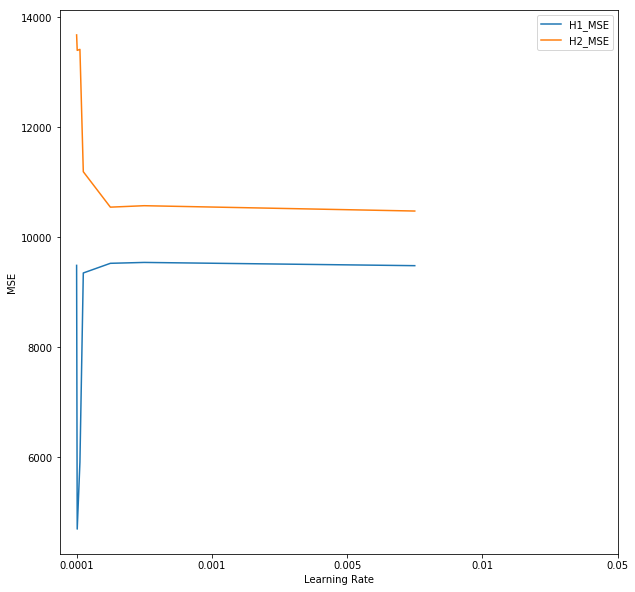

In [78]:

plt.figure(figsize = (10,10))
for c in ['H1_MSE', 'H2_MSE']:
    plt.plot(LR_LOSS['lr'], LR_LOSS[c], label = c)
plt.xticks(np.arange(0, 1, step=0.2), lr)
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('MSE')